<a href="https://colab.research.google.com/github/qusaysellat/tensorflow-tutorial/blob/master/auto-encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE AUTO-ENCODER FOR** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [0]:
# first lets import the used libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# then we will import mnist dataset
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
# and read it in a variable named 'mnist'
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

W0906 10:34:31.972802 140195345590144 deprecation.py:323] From <ipython-input-3-670428428519>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0906 10:34:31.975662 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0906 10:34:31.978654 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0906 10:34:32.260607 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0906 10:34:32.263460 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0906 10:34:32.319212 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# lets try to play with this data set

# lets see the dimensions of train, validation, and test datasets - note that mnist is a named tupple
print(mnist.train._images.shape)
print(mnist.train._labels.shape)
print(mnist[1]._images.shape)
print(mnist[1]._labels.shape)
print(getattr(mnist, 'test')._images.shape)
print(getattr(mnist, 'test')._labels.shape)

(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)


In [0]:
# lets take a sample of our data and discover its values
print('the first 8 labels in the training set:')
print(mnist[0]._labels[:8, : ])

the first 8 labels in the training set:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


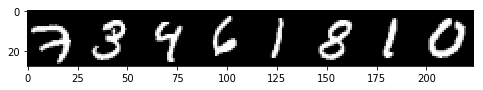

In [0]:
# now lets draw the sample we have just viewed

canvas = np.zeros((28, 28 * 8))
for i in range(8):
  canvas[:, 28 * i : 28 * (i + 1)] = mnist[0].images[i, :].reshape([28 ,28])
  
plt.figure(figsize = (8, 64))
plt.imshow(canvas, origin = 'upper', cmap ='gray')
plt.show()

In [0]:
# now we have to initialize important hyperparameters
LR = 0.01
Iterations = 50001
Batch = 128 

In [0]:
# then we define model sturcture

# number of features
F = mnist.train._images.shape[1]

# placeholder for input
X = tf.placeholder(dtype = 'float32', shape = (None, F), name = 'X')

# dimensions of hidden layers
H1 = 256
H2 = 128

# weights and biases
W = {
    'W1' : tf.Variable(tf.random_normal([F, H1])),
    'W2' : tf.Variable(tf.random_normal([H1, H2])),
    'W3' : tf.Variable(tf.random_normal([H2, H1])),
    'W4' : tf.Variable(tf.random_normal([H1, F]))
}

b = {
    'b1' : tf.Variable(tf.random_normal([1, H1])),
    'b2' : tf.Variable(tf.random_normal([1, H2])),
    'b3' : tf.Variable(tf.random_normal([1, H1])),
    'b4' : tf.Variable(tf.random_normal([1, F]))
}

In [0]:
# now lets start build the model

# first we define the encoder part
def encoder(x, W, b):
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W1']), b['b1']))
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W2']), b['b2']))
  return x

# then we do the decoder
def decoder(x, W, b):
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W3']), b['b3']))
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W4']), b['b4']))
  return x

# now we apply above functions on the given input
encoded_X = encoder(X, W, b)
decoded_X = decoder(encoded_X, W, b)

# define the target and predicted outputs
Yt = X
Yp = decoded_X

# define the loss function
loss = tf.reduce_mean((Yp - Yt) ** 2)

# define the optimization function
optimizer = tf.train.RMSPropOptimizer(LR).minimize(loss)

# initialize global variables
init = tf.global_variables_initializer()

W0906 10:34:33.283924 140195345590144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 10:34:33.352761 140195345590144 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Step 0: Minibatch Loss: 0.442241
Step 1000: Minibatch Loss: 0.118684
Step 2000: Minibatch Loss: 0.107521
Step 3000: Minibatch Loss: 0.096735
Step 4000: Minibatch Loss: 0.089181
Step 5000: Minibatch Loss: 0.084071
Step 6000: Minibatch Loss: 0.083456
Step 7000: Minibatch Loss: 0.079399
Step 8000: Minibatch Loss: 0.078905
Step 9000: Minibatch Loss: 0.075389
Step 10000: Minibatch Loss: 0.074332
Step 11000: Minibatch Loss: 0.074010
Step 12000: Minibatch Loss: 0.070646
Step 13000: Minibatch Loss: 0.067979
Step 14000: Minibatch Loss: 0.066179
Step 15000: Minibatch Loss: 0.065672
Step 16000: Minibatch Loss: 0.064615
Step 17000: Minibatch Loss: 0.063910
Step 18000: Minibatch Loss: 0.060684
Step 19000: Minibatch Loss: 0.059625
Step 20000: Minibatch Loss: 0.059690
Step 21000: Minibatch Loss: 0.057602
Step 22000: Minibatch Loss: 0.053846
Step 23000: Minibatch Loss: 0.054531
Step 24000: Minibatch Loss: 0.052592
Step 25000: Minibatch Loss: 0.051139
Step 26000: Minibatch Loss: 0.053829
Step 27000: Mi

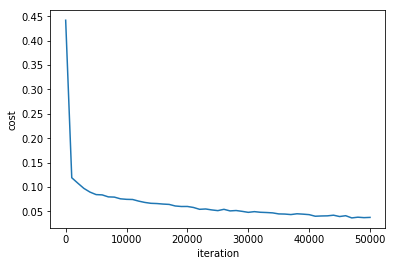

In [0]:
# now we will train our constructed model

# first lets define a new session
sess = tf.Session()

# run the tf initializer
sess.run(init)

# initialize cost array
costs = list()

# now we will get the batches and run the optimizer on them
for i in range(Iterations):
  
  # get next batch
  batch_x, batch_y = mnist.train.next_batch(Batch)
  
  # run the optimizer
  _, l = sess.run([optimizer, loss], feed_dict = {X: batch_x})
  
  # display loss value
  if i % 1000 == 0 :
    print('Step %i: Minibatch Loss: %f' % (i, l))
    costs.append([i, l])
    
print('notice how calculated cost changes with iterations :')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.plot([i[0] for i in costs], [i[1] for i in costs])
plt.show()

Original Digits:


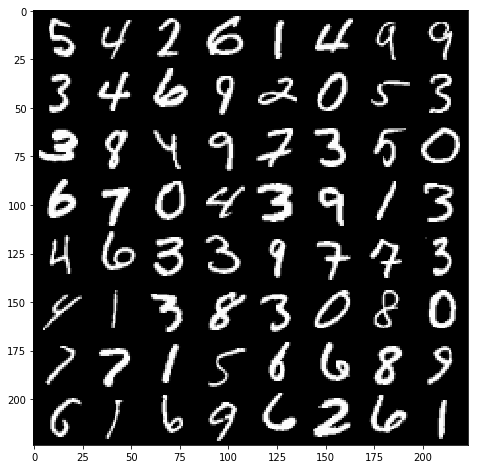

Reconstructed Digits:


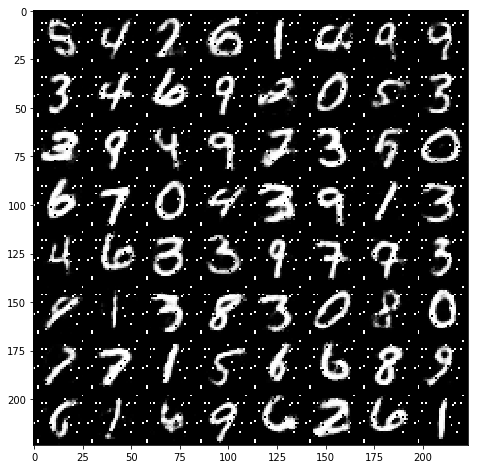

In [0]:
# lets now test our trained model

# it would be better if we visualize the results

# number of examples per each row/column
n = 8

# we would like not to waste the space, lets define canvases for drawing
canvas1 = np.zeros((28*n, 28*n))
canvas2 = np.zeros((28*n, 28*n))

for i in range(n) :
  
  # get the next batch
  batch_x, batch_y = mnist.test.next_batch(n)
  
  # calculate the predicted values
  decoded_x = sess.run(decoded_X, feed_dict = {X : batch_x})
  
  for j in range(n) :
     
      # draw the images of true labels
      canvas1[28 * i : 28 * (i + 1), 28 * j : 28 * (j + 1)] = batch_x[j].reshape([28, 28])
      
      # draw the images of predicted labels
      canvas2[28 * i : 28 * (i + 1), 28 * j : 28 * (j + 1)] = decoded_x[j].reshape([28, 28])

print('Original Digits:')      
plt.figure(figsize = (n, n))
plt.imshow(canvas1, origin = 'upper', cmap = 'gray')
plt.show()
  
print('Reconstructed Digits:')
plt.figure(figsize = (n, n))
plt.imshow(canvas2, origin = 'upper', cmap = 'gray')
plt.show()
  